In [2]:
import itertools
from paddle.vision.datasets import Cifar10,MNIST
import matplotlib.pyplot as plt
import numpy as np

In [181]:
cifar10_classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [182]:
cifar10_train = Cifar10(
    mode= 'train',
    backend="cv2"   # 指定要返回的图像类型：PIL.Image 或 numpy.ndarray。必须是 {'pil'，'cv2'} 中的值
)

mnist_train = MNIST(
    mode= 'train',
    backend="cv2" 
)

print(type(cifar10_train),len(cifar10_train))
print(type(mnist_train),len(mnist_train))

<class 'paddle.vision.datasets.cifar.Cifar10'> 50000
<class 'paddle.vision.datasets.mnist.MNIST'> 60000


In [185]:
for img, label in itertools.islice(iter(cifar10_train), 1):
    print(type(img),img.shape,label)
for img, label in itertools.islice(iter(mnist_train), 1):
    print(type(img),img.shape,label)

<class 'numpy.ndarray'> (32, 32, 3) 6
<class 'numpy.ndarray'> (28, 28) [5]


# 复现完成

In [233]:
class DLMT:
    def __init__(self,imgsize,rise_v=100,max_v_add=256,max_v_mul=10):
        self.method_label ="DLMT"
        self.img_size = imgsize
        self.MAX_V_ADD,self.MAX_V_MUL = max_v_add,max_v_mul
        self.RISE_V = rise_v
        self.R_add = np.random.randint(1, self.MAX_V_ADD, size=self.img_size, dtype=np.uint16)
        self.R_mul = np.random.randint(1, self.MAX_V_MUL, size=self.img_size, dtype=np.uint16)
        
    def MAT(self,img):
        return (img + self.R_add)/(255*(1+self.MAX_V_ADD/256))

    def MMT(self,img):
        if self.img_size == (28,28):
            return (img / 255) * self.R_mul/(self.MAX_V_MUL-1)
        r = (img[:, :, 0] / 255) * self.R_mul[:, :, 0]/(self.MAX_V_MUL-1)
        g = (img[:, :, 1] / 255) * self.R_mul[:, :, 1]/(self.MAX_V_MUL-1)
        b = (img[:, :, 2] / 255) * self.R_mul[:, :, 2]/(self.MAX_V_MUL-1)
        return np.dstack((r, g, b))
    
    def Rise_MMT(self,img):
        img = img + self.RISE_V
        if self.img_size == (28,28):
            return (img)/(255+self.RISE_V-1) * (self.R_mul/(self.MAX_V_MUL-1))
        r = (img[:, :, 0])/(255+self.RISE_V-1) * (self.R_mul[:, :, 0]/(self.MAX_V_MUL-1))
        g = (img[:, :, 1])/(255+self.RISE_V-1) * (self.R_mul[:, :, 1]/(self.MAX_V_MUL-1))
        b = (img[:, :, 2])/(255+self.RISE_V-1) * (self.R_mul[:, :, 2]/(self.MAX_V_MUL-1))
        return np.dstack((r, g, b))

    def MAT_MMT(self,img):
        img = (img + self.R_add)/(255*(1+self.MAX_V_ADD/256))
        if self.img_size == (28,28):
            return img * self.R_mul/(self.MAX_V_MUL-1)
        r = (img[:, :, 0]) * self.R_mul[:, :, 0]/(self.MAX_V_MUL-1)
        g = (img[:, :, 1]) * self.R_mul[:, :, 1]/(self.MAX_V_MUL-1)
        b = (img[:, :, 2]) * self.R_mul[:, :, 2]/(self.MAX_V_MUL-1)
        return np.dstack((r, g, b)) 

    def MMT_MAT(self,img):
        if self.img_size == (28,28):
            return (img * self.R_mul/(self.MAX_V_MUL-1)+ self.R_add)/(255*(1+self.MAX_V_ADD/256))
        r = (img[:, :, 0] / 255) * self.R_mul[:, :, 0]/(self.MAX_V_MUL-1)
        g = (img[:, :, 1] / 255) * self.R_mul[:, :, 1]/(self.MAX_V_MUL-1)
        b = (img[:, :, 2] / 255) * self.R_mul[:, :, 2]/(self.MAX_V_MUL-1)
        img = np.dstack((r, g, b))
        return (img + self.R_add)/(255*(1+self.MAX_V_ADD/256))

In [234]:
dlmt = DLMT(imgsize=(28,28),rise_v=100,max_v_add=256,max_v_mul=10)
print(dlmt.method_label)

DLMT


In [235]:
print(dlmt.R_add,dlmt.R_add.shape)
# print(dlmt.R_mul,dlmt.R_mul.shape)

[[ 76   2  55 188 162 168 108  77 160  30 245 221 160 226 153 155   4 164
   46 174 170 253 232 130  81 180 202  73]
 [132 134  21 101 100 191  71 228 192 210  29  41  36  81 171 184 221 177
   97 197  13  37 186   3  47 151 205 220]
 [ 80  44   2  34 231 186  11 220  73 146  74   9  33 162  67 214  49   1
  169 177 149 138 239  14  89  54 136 246]
 [144  38 241 141 147  55  50   1 199 223 204 162 121  53  11 108  93 120
  249  21   9  48 130  80 224 143 205 221]
 [ 81 251  70 162   7 253  68 100 137 252 156  94 127  55 187   2 164  35
  215  53 238  55  11 154 192  54  39 114]
 [192 246 173 135  93 149 109  84 178  81   7 126 219 114 201  96 147  51
  252  47 161  61 125 212 103 254  62 228]
 [131  20 197 135 166 202 183  48 104  22 203  68 172 164  58  37 242 236
  149 153  87  20   8  52 246 221 145 203]
 [169  29 153  77 221  43  19 167  59 110 140 222  64 118 113  81 242 217
  104  84 132 232  21 120  95 200  12  85]
 [153  86 168 113 108 243  89 187  96 185 215 212 249  46 121 13

## MAT

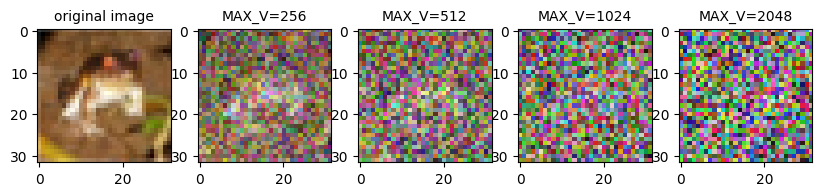

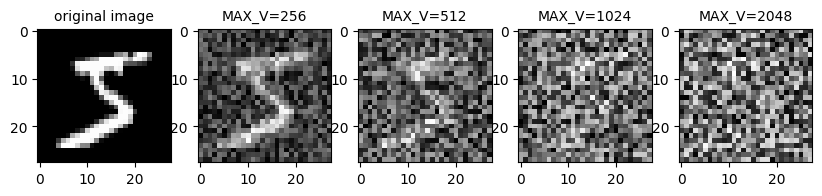

In [236]:
def show_mat(img,imgsize):
    fig = plt.figure(figsize=(10,10)) 
    ax1 = fig.add_subplot(1, 5, 1)  # 2行1列，第1个位置  
    plt.title('original image',fontsize=10)
    ax1.imshow(img,cmap='gray')

    img2mat = DLMT(imgsize=imgsize,max_v_add=256).MAT(img)
    ax2 = fig.add_subplot(1, 5, 2)
    plt.title('MAX_V=256',fontsize=10)
    ax2.imshow(img2mat,cmap='gray')

    img2mat = DLMT(imgsize=imgsize,max_v_add=512).MAT(img)
    ax2 = fig.add_subplot(1, 5, 3)
    plt.title('MAX_V=512',fontsize=10)
    ax2.imshow(img2mat,cmap='gray')

    img2mat = DLMT(imgsize=imgsize,max_v_add=1024).MAT(img)
    ax2 = fig.add_subplot(1, 5, 4)
    plt.title('MAX_V=1024',fontsize=10)
    ax2.imshow(img2mat,cmap='gray')

    img2mat = DLMT(imgsize=imgsize,max_v_add=2048).MAT(img)
    ax2 = fig.add_subplot(1, 5, 5)
    plt.title('MAX_V=2048',fontsize=10)
    ax2.imshow(img2mat,cmap='gray')

for img, label in itertools.islice(iter(cifar10_train), 1):
    img = img.astype(np.uint8)
    show_mat(img,imgsize=(32,32,3))
for img, label in itertools.islice(iter(mnist_train), 1):
    img = img.astype(np.uint8)
    show_mat(img,imgsize=(28,28))

## MMT

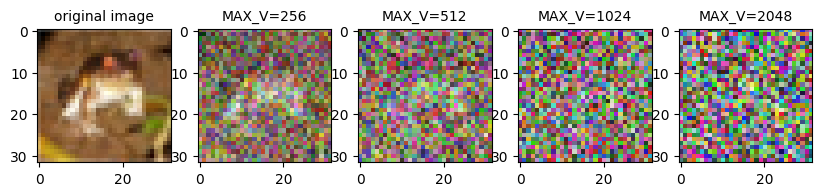

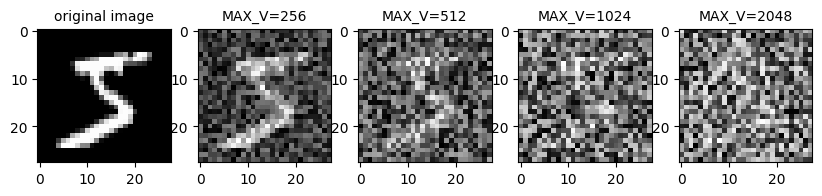

In [237]:
def show_mmt(img,imgsize):
    fig = plt.figure(figsize=(10,10)) 
    ax1 = fig.add_subplot(1, 5, 1)  # 2行1列，第1个位置  
    plt.title('original image',fontsize=10)
    ax1.imshow(img,cmap='gray')

    img2mmt = DLMT(imgsize=imgsize,max_v_mul=10).MMT(img)
    ax2 = fig.add_subplot(1, 5, 2)
    plt.title('MAX_V=10',fontsize=10)
    ax2.imshow(img2mmt,cmap='gray')
    
    img2mmt = DLMT(imgsize=imgsize,max_v_mul=100).MMT(img)
    ax2 = fig.add_subplot(1, 5, 3)
    plt.title('MAX_V=100',fontsize=10)
    ax2.imshow(img2mmt,cmap='gray')
    
    img2mmt = DLMT(imgsize=imgsize,max_v_mul=1000).MMT(img)
    ax2 = fig.add_subplot(1, 5, 4)
    plt.title('MAX_V=100',fontsize=10)
    ax2.imshow(img2mmt,cmap='gray')
    
    img2mmt = DLMT(imgsize=imgsize,max_v_mul=10000).MMT(img)
    ax2 = fig.add_subplot(1, 5, 5)
    plt.title('MAX_V=10000',fontsize=10)
    ax2.imshow(img2mmt,cmap='gray')
    
for img, label in itertools.islice(iter(cifar10_train), 1):
    img = img.astype(np.uint8)
    show_mat(img,imgsize=(32,32,3))
for img, label in itertools.islice(iter(mnist_train), 1):
    img = img.astype(np.uint8)
    show_mat(img,imgsize=(28,28))

## Rise + MMT

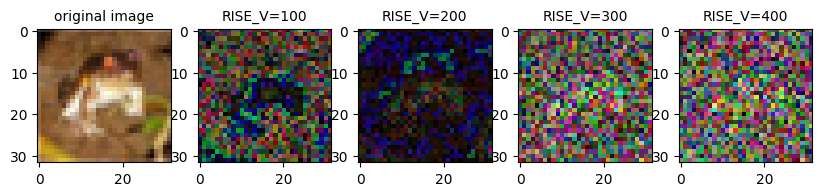

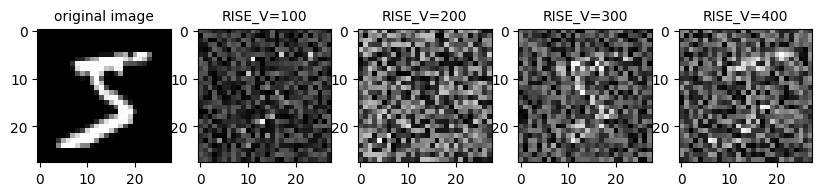

In [248]:
def show_rise_mmt(img,imgsize):
    fig = plt.figure(figsize=(10,10)) 
    ax1 = fig.add_subplot(1, 5, 1)  # 2行1列，第1个位置  
    plt.title('original image',fontsize=10)
    ax1.imshow(img,cmap='gray')

    img2rise_mmt = DLMT(imgsize=imgsize,rise_v=100,max_v_mul=1000).Rise_MMT(img)
    ax2 = fig.add_subplot(1, 5, 2)
    plt.title('RISE_V=100',fontsize=10)
    ax2.imshow(img2rise_mmt,cmap='gray')
    
    img2rise_mmt = DLMT(imgsize=imgsize,rise_v=200,max_v_mul=1000).Rise_MMT(img)
    ax2 = fig.add_subplot(1, 5, 3)
    plt.title('RISE_V=200',fontsize=10)
    ax2.imshow(img2rise_mmt,cmap='gray')
    
    img2rise_mmt = DLMT(imgsize=imgsize,rise_v=300,max_v_mul=1000).Rise_MMT(img)
    ax2 = fig.add_subplot(1, 5, 4)
    plt.title('RISE_V=300',fontsize=10)
    ax2.imshow(img2rise_mmt,cmap='gray')
    
    img2rise_mmt = DLMT(imgsize=imgsize,rise_v=400,max_v_mul=1000).Rise_MMT(img)
    ax2 = fig.add_subplot(1, 5, 5)
    plt.title('RISE_V=400',fontsize=10)
    ax2.imshow(img2rise_mmt,cmap='gray')
    
for img, label in itertools.islice(iter(cifar10_train), 1):
    img = img.astype(np.uint8)
    show_rise_mmt(img,imgsize=(32,32,3))
for img, label in itertools.islice(iter(mnist_train), 1):
    img = img.astype(np.uint8)
    show_rise_mmt(img,imgsize=(28,28))

## MAT + MMT

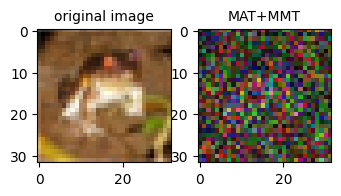

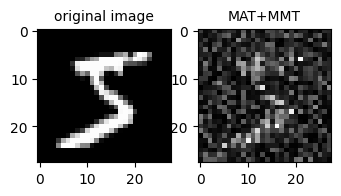

In [246]:
def show_mat_mmt(img,imgsize):
    fig = plt.figure(figsize=(10,10)) 
    ax1 = fig.add_subplot(1, 5, 1)  # 2行1列，第1个位置  
    plt.title('original image',fontsize=10)
    ax1.imshow(img,cmap='gray')
    
    img2mat_mmt = DLMT(imgsize=imgsize,max_v_add=256,max_v_mul=10).MAT_MMT(img)
    ax2 = fig.add_subplot(1, 5, 2)
    plt.title('MAT+MMT',fontsize=10)
    ax2.imshow(img2mat_mmt,cmap='gray')

for img, label in itertools.islice(iter(cifar10_train), 1):
    img = img.astype(np.uint8)
    show_mat_mmt(img,imgsize=(32,32,3))
for img, label in itertools.islice(iter(mnist_train), 1):
    img = img.astype(np.uint8)
    show_mat_mmt(img,imgsize=(28,28))

## MMT + MAT

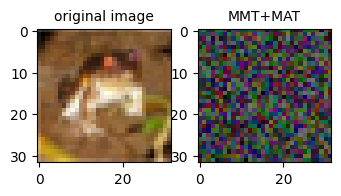

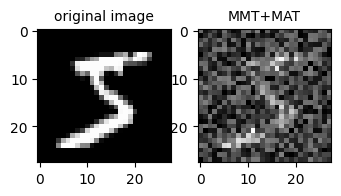

In [245]:
def show_mmt_mat(img,imgsize):
    fig = plt.figure(figsize=(10,10)) 
    ax1 = fig.add_subplot(1, 5, 1)  # 2行1列，第1个位置  
    plt.title('original image',fontsize=10)
    ax1.imshow(img,cmap='gray')
    
    img2mmt_mat = DLMT(imgsize=imgsize,max_v_add=256,max_v_mul=10).MMT_MAT(img)
    ax2 = fig.add_subplot(1, 5, 2)
    plt.title('MMT+MAT',fontsize=10)
    ax2.imshow(img2mmt_mat,cmap='gray')

for img, label in itertools.islice(iter(cifar10_train), 1):
    img = img.astype(np.uint8)
    show_mmt_mat(img,imgsize=(32,32,3))
for img, label in itertools.islice(iter(mnist_train), 1):
    img = img.astype(np.uint8)
    show_mmt_mat(img,imgsize=(28,28))